# Anaylizing NBA Game stats 2014-2019

In [1]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from scipy import stats # significance levels, normality
import itertools

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
game_detail_df = pd.read_csv('Datasets/games_details.csv')
games_df = pd.read_csv('Datasets/games.csv')
players_df = pd.read_csv('Datasets/players.csv')
ranking_df = pd.read_csv('Datasets/ranking.csv')
teams_df = pd.read_csv('Datasets/teams.csv')

# EDA on our Data

### Inspecting game_detail_df

In [3]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,40800405,1610612747,LAL,Los Angeles,2772,Trevor Ariza,F,NaN,41:29,5.0,...,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0,12.0
1,40800405,1610612747,LAL,Los Angeles,2200,Pau Gasol,F,NaN,42:09,6.0,...,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0,15.0
2,40800405,1610612747,LAL,Los Angeles,101115,Andrew Bynum,C,NaN,16:54,3.0,...,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0,-6.0
3,40800405,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,NaN,43:18,10.0,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,14.0
4,40800405,1610612747,LAL,Los Angeles,965,Derek Fisher,G,NaN,31:59,4.0,...,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0,16.0


In [4]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561733 entries, 0 to 561732
Data columns (total 28 columns):
GAME_ID              561733 non-null int64
TEAM_ID              561733 non-null int64
TEAM_ABBREVIATION    561733 non-null object
TEAM_CITY            561733 non-null object
PLAYER_ID            561733 non-null int64
PLAYER_NAME          561733 non-null object
START_POSITION       215354 non-null object
COMMENT              89924 non-null object
MIN                  471808 non-null object
FGM                  471808 non-null float64
FGA                  471808 non-null float64
FG_PCT               471808 non-null float64
FG3M                 471808 non-null float64
FG3A                 471808 non-null float64
FG3_PCT              471808 non-null float64
FTM                  471808 non-null float64
FTA                  471808 non-null float64
FT_PCT               471808 non-null float64
OREB                 471808 non-null float64
DREB                 471808 non-null float64
RE

Removing unnecessary Columns from our game_detail_df

In [5]:
game_detail_df.drop(columns=['COMMENT', 'PLUS_MINUS', 'START_POSITION'], inplace=True)

In [6]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,40800405,1610612747,LAL,Los Angeles,2772,Trevor Ariza,41:29,5.0,12.0,0.417,...,0.5,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0
1,40800405,1610612747,LAL,Los Angeles,2200,Pau Gasol,42:09,6.0,9.0,0.667,...,0.5,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0
2,40800405,1610612747,LAL,Los Angeles,101115,Andrew Bynum,16:54,3.0,11.0,0.273,...,0.0,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0
3,40800405,1610612747,LAL,Los Angeles,977,Kobe Bryant,43:18,10.0,23.0,0.435,...,1.0,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0
4,40800405,1610612747,LAL,Los Angeles,965,Derek Fisher,31:59,4.0,7.0,0.571,...,1.0,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0


In [7]:
# Create a new Column called DF_SCORE based on
game_detail_df["DF_SCORE"] = round((game_detail_df.PTS + game_detail_df.FG3M *0.5 + game_detail_df.REB *1.25 + game_detail_df.AST * 1.5 + game_detail_df.STL *2 + game_detail_df.BLK *2 - game_detail_df.TO * 0.5),2)

In [8]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,DF_SCORE
0,40800405,1610612747,LAL,Los Angeles,2772,Trevor Ariza,41:29,5.0,12.0,0.417,...,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0,26.25
1,40800405,1610612747,LAL,Los Angeles,2200,Pau Gasol,42:09,6.0,9.0,0.667,...,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0,44.75
2,40800405,1610612747,LAL,Los Angeles,101115,Andrew Bynum,16:54,3.0,11.0,0.273,...,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0,13.75
3,40800405,1610612747,LAL,Los Angeles,977,Kobe Bryant,43:18,10.0,23.0,0.435,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,57.50
4,40800405,1610612747,LAL,Los Angeles,965,Derek Fisher,31:59,4.0,7.0,0.571,...,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0,21.00


In [9]:
game_detail_df.dropna(axis='rows', inplace=True)

In [10]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471808 entries, 0 to 561732
Data columns (total 26 columns):
GAME_ID              471808 non-null int64
TEAM_ID              471808 non-null int64
TEAM_ABBREVIATION    471808 non-null object
TEAM_CITY            471808 non-null object
PLAYER_ID            471808 non-null int64
PLAYER_NAME          471808 non-null object
MIN                  471808 non-null object
FGM                  471808 non-null float64
FGA                  471808 non-null float64
FG_PCT               471808 non-null float64
FG3M                 471808 non-null float64
FG3A                 471808 non-null float64
FG3_PCT              471808 non-null float64
FTM                  471808 non-null float64
FTA                  471808 non-null float64
FT_PCT               471808 non-null float64
OREB                 471808 non-null float64
DREB                 471808 non-null float64
REB                  471808 non-null float64
AST                  471808 non-null float64

In [11]:
#cleaning our column for our join and then Hypothesis
game_player_detail = game_detail_df[['GAME_ID', 'TEAM_ID','TEAM_CITY','PLAYER_ID', 'PLAYER_NAME', 'MIN', 'DF_SCORE']]
game_player_detail

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE
0,40800405,1610612747,Los Angeles,2772,Trevor Ariza,41:29,26.25
1,40800405,1610612747,Los Angeles,2200,Pau Gasol,42:09,44.75
2,40800405,1610612747,Los Angeles,101115,Andrew Bynum,16:54,13.75
3,40800405,1610612747,Los Angeles,977,Kobe Bryant,43:18,57.50
4,40800405,1610612747,Los Angeles,965,Derek Fisher,31:59,21.00
5,40800405,1610612747,Los Angeles,1885,Lamar Odom,31:44,31.50
6,40800405,1610612747,Los Angeles,2575,Luke Walton,14:07,6.00
7,40800405,1610612747,Los Angeles,200770,Jordan Farmar,13:38,3.50
8,40800405,1610612747,Los Angeles,2756,Sasha Vujacic,4:42,0.00
12,40800405,1610612753,Orlando,2045,Hedo Turkoglu,42:05,20.50


### Inspecting game_df 

In [12]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2014-06-15,41300405,Final,1610612759,1610612748,2013,1610612759,104.0,0.474,0.783,...,25.0,40.0,1610612748,87.0,0.400,0.741,0.280,14.0,41.0,1
1,2014-06-12,41300404,Final,1610612748,1610612759,2013,1610612748,86.0,0.451,0.650,...,13.0,27.0,1610612759,107.0,0.571,0.720,0.429,25.0,44.0,0
2,2014-06-10,41300403,Final,1610612748,1610612759,2013,1610612748,92.0,0.516,0.750,...,17.0,26.0,1610612759,111.0,0.594,0.813,0.450,21.0,29.0,0
3,2014-06-08,41300402,Final,1610612759,1610612748,2013,1610612759,96.0,0.439,0.600,...,26.0,37.0,1610612748,98.0,0.529,0.762,0.421,16.0,38.0,0
4,2014-06-05,41300401,Final,1610612759,1610612748,2013,1610612759,110.0,0.588,0.773,...,30.0,39.0,1610612748,95.0,0.474,0.818,0.414,16.0,29.0,1


In [13]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22594 entries, 0 to 22593
Data columns (total 21 columns):
GAME_DATE_EST       22594 non-null object
GAME_ID             22594 non-null int64
GAME_STATUS_TEXT    22594 non-null object
HOME_TEAM_ID        22594 non-null int64
VISITOR_TEAM_ID     22594 non-null int64
SEASON              22594 non-null int64
TEAM_ID_home        22594 non-null int64
PTS_home            22495 non-null float64
FG_PCT_home         22495 non-null float64
FT_PCT_home         22495 non-null float64
FG3_PCT_home        22495 non-null float64
AST_home            22495 non-null float64
REB_home            22495 non-null float64
TEAM_ID_away        22594 non-null int64
PTS_away            22495 non-null float64
FG_PCT_away         22495 non-null float64
FT_PCT_away         22495 non-null float64
FG3_PCT_away        22495 non-null float64
AST_away            22495 non-null float64
REB_away            22495 non-null float64
HOME_TEAM_WINS      22594 non-null int64
dtyp

In [14]:
# We are taking these specific columns, we will use them in order to test our first Hypothesis
game_hometeam_df = games_df[['GAME_ID','GAME_DATE_EST', 'HOME_TEAM_ID', 'HOME_TEAM_WINS', 'SEASON']]
game_hometeam_df.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON
0,41300405,2014-06-15,1610612759,1,2013
1,41300404,2014-06-12,1610612748,0,2013
2,41300403,2014-06-10,1610612748,0,2013
3,41300402,2014-06-08,1610612759,0,2013
4,41300401,2014-06-05,1610612759,1,2013


In [15]:
# games_df.drop(columns=['GAME_STATUS_TEXT'], inplace=True)

In [16]:
# games_df.dropna(axis='rows', inplace=True)

In [17]:
#join both game_hometeam_df and game_player_detail
df2 = pd.merge(game_player_detail, game_hometeam_df, on='GAME_ID')
df2.HOME_TEAM_WINS.value_counts()

1    283221
0    188607
Name: HOME_TEAM_WINS, dtype: int64

In [18]:
df2.head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON
0,40800405,1610612747,Los Angeles,2772,Trevor Ariza,41:29,26.25,2009-06-14,1610612753,0,2008
1,40800405,1610612747,Los Angeles,2200,Pau Gasol,42:09,44.75,2009-06-14,1610612753,0,2008
2,40800405,1610612747,Los Angeles,101115,Andrew Bynum,16:54,13.75,2009-06-14,1610612753,0,2008
3,40800405,1610612747,Los Angeles,977,Kobe Bryant,43:18,57.50,2009-06-14,1610612753,0,2008
4,40800405,1610612747,Los Angeles,965,Derek Fisher,31:59,21.00,2009-06-14,1610612753,0,2008


In [19]:
df2.loc[(df2['TEAM_ID'] == df2['HOME_TEAM_ID']), 'HOME'] = 1
df2.loc[(df2['TEAM_ID'] != df2['HOME_TEAM_ID']), 'HOME'] = 0

In [20]:
df2.head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON,HOME
0,40800405,1610612747,Los Angeles,2772,Trevor Ariza,41:29,26.25,2009-06-14,1610612753,0,2008,0.0
1,40800405,1610612747,Los Angeles,2200,Pau Gasol,42:09,44.75,2009-06-14,1610612753,0,2008,0.0
2,40800405,1610612747,Los Angeles,101115,Andrew Bynum,16:54,13.75,2009-06-14,1610612753,0,2008,0.0
3,40800405,1610612747,Los Angeles,977,Kobe Bryant,43:18,57.50,2009-06-14,1610612753,0,2008,0.0
4,40800405,1610612747,Los Angeles,965,Derek Fisher,31:59,21.00,2009-06-14,1610612753,0,2008,0.0


In [21]:
df2.loc[(df2['HOME'] == df2['HOME_TEAM_WINS']), 'WIN'] = 1
df2.loc[(df2['HOME'] != df2['HOME_TEAM_WINS']), 'WIN'] = 0

In [22]:
df3 = df2.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df3.sort_values(ascending=False)

PLAYER_NAME
LeBron James             50.725442
Russell Westbrook        46.300865
Anthony Davis            46.237569
Joel Embiid              45.474880
Kevin Durant             45.455502
Luka Doncic              45.257653
Karl-Anthony Towns       44.193919
Kobe Bryant              43.520244
James Harden             43.460733
Stephen Curry            42.919828
Allen Iverson            42.796638
DeMarcus Cousins         42.518791
Chris Paul               41.980200
John Wall                41.048536
Ben Simmons              40.699052
Blake Griffin            40.681502
Damian Lillard           40.466237
Giannis Antetokounmpo    40.080616
Dwight Howard            39.228862
Dwyane Wade              38.790416
Nikola Jokic             38.622940
Carmelo Anthony          38.450783
Trae Young               38.430180
Tim Duncan               38.410256
Kyrie Irving             38.162151
Andre Drummond           37.841167
Baron Davis              37.566102
Paul George              36.976027
Kevin Lo

In [23]:
df4 = df2.groupby('PLAYER_NAME')['DF_SCORE'].count()
df4.sort_values(ascending=False)

PLAYER_NAME
LeBron James          1527
Kyle Korver           1404
Tony Parker           1345
Vince Carter          1338
Andre Iguodala        1336
Dirk Nowitzki         1330
Jamal Crawford        1309
Joe Johnson           1307
Dwyane Wade           1299
Pau Gasol             1269
Jason Terry           1267
Boris Diaw            1254
Zaza Pachulia         1245
Manu Ginobili         1235
Dwight Howard         1230
David West            1220
Carmelo Anthony       1214
Trevor Ariza          1205
Richard Jefferson     1198
Paul Pierce           1187
Tayshaun Prince       1171
Tim Duncan            1170
Marvin Williams       1163
JR Smith              1163
Tyson Chandler        1149
Chris Paul            1149
Paul Millsap          1136
Zach Randolph         1135
Devin Harris          1117
Andre Miller          1115
                      ... 
Angel Rodriguez          1
Jeremiah Martin          1
Jeffrey Carroll          1
Rick Apodaca             1
Jeff Van Gundy           1
Johnny Hamilton 

In [24]:
frame = { 'DF_SCORES': df3, 'GAMES_PLAYED': df4 } 
df5 = pd.DataFrame(frame)
df5.head()

,DF_SCORES,GAMES_PLAYED
PLAYER_NAME,,
A.J. Guyton,10.000000,1
AJ Hammons,6.793103,29
AJ Price,12.107143,301
Aaron Brooks,17.217406,744
Aaron Craft,9.750000,4


In [25]:
df_top_player = df5.loc[(df5['GAMES_PLAYED'] > 20)] #250 - 20
top_players = list(df_top_player.index)
print(top_players)

['AJ Hammons', 'AJ Price', 'Aaron Brooks', 'Aaron Gordon', 'Aaron Gray', 'Aaron Harrison', 'Aaron Holiday', 'Aaron McKie', 'Aaron Miles', 'Aaron Williams', 'Abdel Nader', 'Acie Law', 'Adam Morrison', 'Adonal Foyle', 'Adreian Payne', 'Adrian Griffin', 'Al Harrington', 'Al Horford', 'Al Jefferson', 'Al Thornton', 'Al-Farouq Aminu', 'Alan Anderson', 'Alan Henderson', 'Alan Williams', 'Alando Tucker', 'Alec Burks', 'Alec Peters', 'Alex Abrines', 'Alex Acker', 'Alex Caruso', 'Alex Len', 'Alex Poythress', 'Alexander Johnson', 'Alexey Shved', 'Alexis Ajinca', 'Alfonzo McKinnie', 'Alize Johnson', 'Allan Houston', 'Allan Ray', 'Allen Crabbe', 'Allen Iverson', 'Allonzo Trier', 'Alonzo Gee', 'Alonzo Mourning', 'Alvin Williams', 'Amal McCaskill', "Amar'e Stoudemire", 'Amile Jefferson', 'Amir Johnson', 'Anderson Varejao', 'Andray Blatche', 'Andre Barrett', 'Andre Brown', 'Andre Drummond', 'Andre Emmett', 'Andre Iguodala', 'Andre Miller', 'Andre Owens', 'Andre Roberson', 'Andrea Bargnani', 'Andreas 

In [26]:
def minutes(value):
    list_nb = value.split(":")
    if len(list_nb) == 1:
        return float(list_nb[0])
    else:
        return round(float(list_nb[0]) + (float(list_nb[1]) / 60), 2)

In [27]:
df2["MIN"] = df2["MIN"].apply(minutes)

In [58]:
df7 = df2.loc[(df2["PLAYER_NAME"].isin(top_players))]
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467542 entries, 0 to 471827
Data columns (total 13 columns):
GAME_ID           467542 non-null int64
TEAM_ID           467542 non-null int64
TEAM_CITY         467542 non-null object
PLAYER_ID         467542 non-null int64
PLAYER_NAME       467542 non-null object
MIN               467542 non-null float64
DF_SCORE          467542 non-null float64
GAME_DATE_EST     467542 non-null object
HOME_TEAM_ID      467542 non-null int64
HOME_TEAM_WINS    467542 non-null int64
SEASON            467542 non-null int64
HOME              467542 non-null float64
WIN               467542 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 49.9+ MB


In [59]:
df_home = df7.loc[df7["HOME"] == 1]
df_away = df7.loc[df7["HOME"] == 0]
df_home.head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON,HOME,WIN
9,40800405,1610612753,Orlando,2045,Hedo Turkoglu,42.08,20.50,2009-06-14,1610612753,0,2008,1.0,0.0
10,40800405,1610612753,Orlando,1740,Rashard Lewis,44.53,39.00,2009-06-14,1610612753,0,2008,1.0,0.0
11,40800405,1610612753,Orlando,2730,Dwight Howard,39.20,31.50,2009-06-14,1610612753,0,2008,1.0,0.0
12,40800405,1610612753,Orlando,201584,Courtney Lee,26.32,20.50,2009-06-14,1610612753,0,2008,1.0,0.0
13,40800405,1610612753,Orlando,1747,Rafer Alston,33.00,25.75,2009-06-14,1610612753,0,2008,1.0,0.0


In [60]:
df_home_averages = df_home.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df_away_averages = df_away.groupby('PLAYER_NAME')['DF_SCORE'].mean()
frame = { 'home_avg': df_home_averages, 'away_avg': df_away_averages } 
df_comparison = pd.DataFrame(frame)

In [61]:
df_comparison = df_comparison.reset_index()
df_comparison["home_edge"] = df_comparison["home_avg"] - df_comparison["away_avg"]
df_comparison.head()

,PLAYER_NAME,home_avg,away_avg,home_edge
0,AJ Hammons,6.500000,7.066667,-0.566667
1,AJ Price,12.397651,11.822368,0.575283
2,Aaron Brooks,17.017717,17.426997,-0.409281
3,Aaron Gordon,26.473171,25.286486,1.186684
4,Aaron Gray,9.856725,9.981383,-0.124658


In [62]:
df_comparison.mean()

home_avg     15.091209
away_avg     14.774365
home_edge     0.316844
dtype: float64

In [63]:
top_10_edge = df_comparison.sort_values(by="home_edge",ascending = False)[:10].reset_index()
top_10_edge.drop(columns='index', inplace=True)
top_10_edge

,PLAYER_NAME,home_avg,away_avg,home_edge
0,Tyler Herro,29.725000,20.615385,9.109615
1,Chris Silva,16.750000,8.020833,8.729167
2,Darius Bazley,16.000000,8.575000,7.425000
3,Matisse Thybulle,15.395833,9.333333,6.062500
4,Nikola Jokic,41.303571,35.942308,5.361264
5,Nickeil Alexander-Walker,19.750000,14.666667,5.083333
6,Terrence Jones,24.524138,19.686620,4.837518
7,Myke Henry,15.500000,10.673077,4.826923
8,Shai Gilgeous-Alexander,26.396552,21.686364,4.710188
9,Gerald Wallace,30.612500,25.903165,4.709335


In [64]:
def two_sample_ttest(sample1, sample2, alpha):
    n_sample1 = len(sample1)
    n_sample2 = len(sample2)
    t_stat, P_value = stats.ttest_ind(sample1, sample2)
    t_crit = stats.t.ppf(1-(alpha/2), (n_sample1+n_sample2-2))
    mean_sample1 = round((sum(sample1)/n_sample1),3)
    mean_sample2 = round((sum(sample2)/n_sample2),3)
    mean_diff = round(abs(mean_sample1 - mean_sample2),3)
    # Outputs:
    print("Two Tail T-test:")
    print("---------------------------------------------------------------")
    print(f"Obs Number: Sample_1 = {n_sample1}   Sample_2 = {n_sample2}")
    print(f"Sample Means: Sample_1 = {mean_sample1}   Sample_2 = {mean_sample2}")
    print(f"Mean Differance: {mean_diff}")
#     sns.distplot(sample1), sns.distplot(sample2)
    print("---------------------------------------------------------------")
    print(f"t-crit: {t_crit} \nt-stat: {t_stat} \nP-value: {P_value} \nAlpha(2-Tail): {alpha/2}")
    print("---------------------------------------------------------------")
    if (abs(t_stat) > t_crit) and (P_value < (alpha/2)):
        print("|t_stat| > t_crit:",(abs(t_stat) > t_crit))
        print("P_value > Alpha(2-Tail):", (P_value < alpha))
        print("\nReject Null Hypothesis! The results shows that the samples are statistically significant.")
    else:
        print("|t_stat| > t_crit:",(abs(t_stat) > t_crit))
        print("P_value < Alpha(2-Tail):", (P_value < (alpha/2)))
        print("\nDo NOT Reject Null Hypotheses. The results are NOT statistically significant.")
    print("---------------------------------------------------------------")
    return None

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 1454   Sample_2 = 1454
Sample Means: Sample_1 = 15.091   Sample_2 = 14.774
Mean Differance: 0.317
---------------------------------------------------------------
t-crit: 1.9607806544639645 
t-stat: 1.0296930684986767 
P-value: 0.3032398031082463 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
|t_stat| > t_crit: False
P_value < Alpha(2-Tail): False

Do NOT Reject Null Hypotheses. The results are NOT statistically significant.
---------------------------------------------------------------


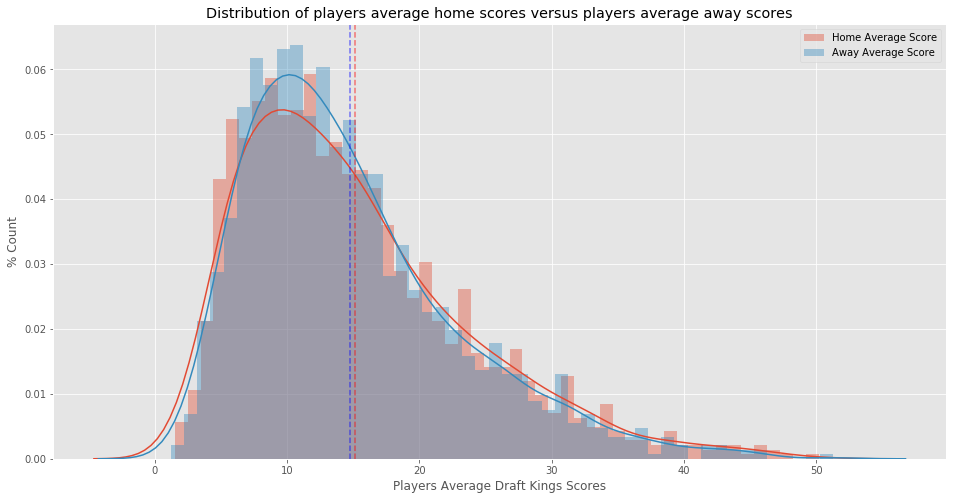

In [65]:
plt.figure(figsize=(16,8))
plt.title('Distribution of players average home scores versus players average away scores')
sns.distplot(df_comparison["home_avg"], label='Home Average Score', bins=50)
sns.distplot(df_comparison["away_avg"], label='Away Average Score',bins=50)
plt.ylabel('% Count')
plt.xlabel('Players Average Draft Kings Scores')
plt.legend()
plt.axvline(x=df_comparison["home_avg"].mean(), color='r',alpha = 0.5, linestyle='--')
plt.axvline(x=df_comparison["away_avg"].mean(), color='b',alpha = 0.5, linestyle='--')
two_sample_ttest(df_comparison["home_avg"], df_comparison["away_avg"], 0.05)

In [69]:
df_h_gerald = df2[(df2["PLAYER_NAME"] == "Gerald Wallace") & (df2["HOME"] == 1) & (df2["MIN"] > 10)]
df_h_gerald = df_h_gerald["DF_SCORE"]
df_a_gerald = df2[(df2["PLAYER_NAME"] == "Gerald Wallace") & (df2["HOME"] == 0) & (df2["MIN"] > 10)]
df_a_gerald = df_a_gerald["DF_SCORE"]

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 388   Sample_2 = 370
Sample Means: Sample_1 = 32.725   Sample_2 = 27.421
Mean Differance: 5.304
---------------------------------------------------------------
t-crit: 1.9631068538120788 
t-stat: 5.284103249845699 
P-value: 1.6539667894975957e-07 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
|t_stat| > t_crit: True
P_value > Alpha(2-Tail): True

Reject Null Hypothesis! The results shows that the samples are statistically significant.
---------------------------------------------------------------


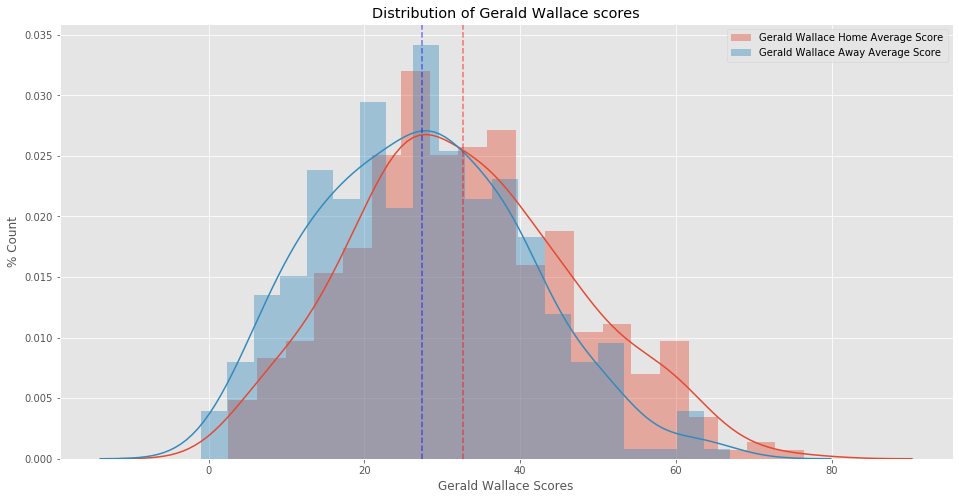

In [70]:
plt.figure(figsize=(16,8))
plt.title('Distribution of Gerald Wallace scores')
sns.distplot(df_h_gerald, label='Gerald Wallace Home Average Score',bins=20)
sns.distplot(df_a_gerald, label='Gerald Wallace Away Average Score',bins=20)
plt.ylabel('% Count')
plt.xlabel('Gerald Wallace Scores')
plt.legend()
plt.axvline(x=df_h_gerald.mean(), color='r',alpha = 0.5, linestyle='--')
plt.axvline(x=df_a_gerald.mean(), color='b',alpha = 0.5, linestyle='--')
two_sample_ttest(df_h_gerald, df_a_gerald, 0.05)

### T-Test

In [38]:
stats.ttest_ind(df_comparison.home_avg, df_comparison.away_avg, equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

### Hypothesis 1: Is there a significant difference in player performance when playing Home vs Away ?

### Hypothesis 2: Is it easier for teams playing in the East to make the playoffs?

In [39]:
ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612759,0,22013,2014-08-31,West,San Antonio,82,62,20,0.756,32-9,30-11
1,1610612760,0,22013,2014-08-31,West,Oklahoma City,82,59,23,0.720,34-7,25-16
2,1610612746,0,22013,2014-08-31,West,L.A. Clippers,82,57,25,0.695,34-7,23-18
3,1610612745,0,22013,2014-08-31,West,Houston,82,54,28,0.659,33-8,21-20
4,1610612757,0,22013,2014-08-31,West,Portland,82,54,28,0.659,31-10,23-18


In [40]:
seasons_ids = list(ranking_df["SEASON_ID"].unique())
seasons_df = []
for season_id in seasons_ids:
    n = str(season_id)[0]
    if n == "1":
        continue
    df = ranking_df[ranking_df["SEASON_ID"] == season_id]
    df = df.drop_duplicates(subset="TEAM")
    df["SEASON_ID"][:] = str(season_id)[1:]
    df = df.reset_index()
    df = df[["SEASON_ID", "CONFERENCE", "TEAM", "G", "W", "L", "W_PCT"]]    
    seasons_df.append(df)

In [41]:
del seasons_df[12]

In [42]:
seasons_df[1][7:8]

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT
7,2012,West,L.A. Lakers,82,45,37,0.549


In [43]:
seasons_df[1][22:23]

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT
22,2012,East,Milwaukee,82,38,44,0.463


In [44]:
west_PO_PCT = []
east_PO_PCT = []
for season in seasons_df:
    west_qualifying_pct = round(float(season[7:8]["W_PCT"])*100,2)
    east_qualifying_pct = round(float(season[22:23]["W_PCT"])*100,2)
    west_PO_PCT.append(west_qualifying_pct)
    east_PO_PCT.append(east_qualifying_pct)

In [45]:
west_PO_PCT

[59.8,
 54.9,
 54.5,
 56.1,
 61.0,
 58.5,
 61.0,
 51.2,
 53.7,
 54.9,
 52.4,
 53.7,
 58.5,
 57.3,
 50.0,
 50.0,
 54.9]

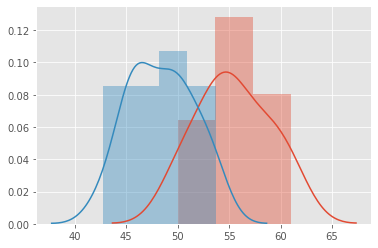

In [46]:
sns.distplot(west_PO_PCT)
sns.distplot(east_PO_PCT)

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 17   Sample_2 = 17
Sample Means: Sample_1 = 55.435   Sample_2 = 48.376
Mean Differance: 7.059
---------------------------------------------------------------
t-crit: 2.036933343460101 
t-stat: 6.154645378955261 
P-value: 6.942372541866661e-07 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
|t_stat| > t_crit: True
P_value > Alpha(2-Tail): True

Reject Null Hypothesis! The results shows that the samples are statistically significant.
---------------------------------------------------------------


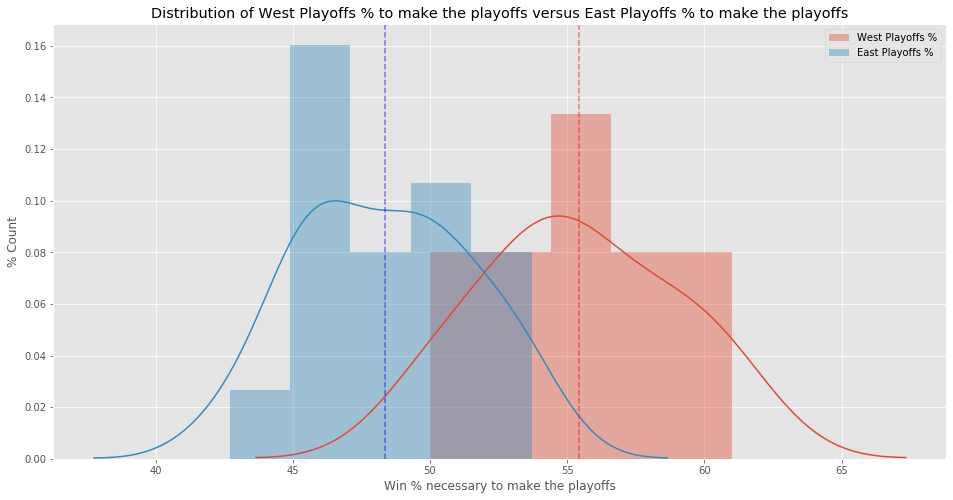

In [47]:
plt.figure(figsize=(16,8))
plt.title('Distribution of West Playoffs % to make the playoffs versus East Playoffs % to make the playoffs')
sns.distplot(west_PO_PCT, label='West Playoffs %', bins=5)
sns.distplot(east_PO_PCT, label='East Playoffs %', bins=5)
plt.ylabel('% Count')
plt.xlabel('Win % necessary to make the playoffs')
plt.legend()
plt.axvline(x=np.array(west_PO_PCT).mean(), color='r',alpha = 0.5, linestyle='--')
plt.axvline(x=np.array(east_PO_PCT).mean(), color='b',alpha = 0.5, linestyle='--')
two_sample_ttest(west_PO_PCT, east_PO_PCT, 0.05)

### Hypothesis 3: Do teams with one superstar caliber player win more games on average ?

In [48]:
df2.head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON,HOME,WIN
0,40800405,1610612747,Los Angeles,2772,Trevor Ariza,41.48,26.25,2009-06-14,1610612753,0,2008,0.0,1.0
1,40800405,1610612747,Los Angeles,2200,Pau Gasol,42.15,44.75,2009-06-14,1610612753,0,2008,0.0,1.0
2,40800405,1610612747,Los Angeles,101115,Andrew Bynum,16.90,13.75,2009-06-14,1610612753,0,2008,0.0,1.0
3,40800405,1610612747,Los Angeles,977,Kobe Bryant,43.30,57.50,2009-06-14,1610612753,0,2008,0.0,1.0
4,40800405,1610612747,Los Angeles,965,Derek Fisher,31.98,21.00,2009-06-14,1610612753,0,2008,0.0,1.0


In [49]:
df2_grouped_season = df2.groupby(['SEASON','TEAM_CITY','PLAYER_NAME'])['DF_SCORE'].mean()
df2_grouped_season = df2_grouped_season.reset_index()
all_star = df2_grouped_season[(df2_grouped_season['SEASON'] == 2014) & (df2_grouped_season['DF_SCORE'] >= 40)]

In [50]:
all_star.TEAM_CITY.value_counts()

Los Angeles      2
Oklahoma City    2
Portland         1
Sacramento       1
Golden State     1
Houston          1
Washington       1
Cleveland        1
New Orleans      1
Name: TEAM_CITY, dtype: int64

In [51]:
seasons_df[1].head()

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT
0,2012,West,Oklahoma City,82,60,22,0.732
1,2012,West,San Antonio,82,58,24,0.707
2,2012,West,Denver,82,57,25,0.695
3,2012,West,L.A. Clippers,82,56,26,0.683
4,2012,West,Memphis,82,56,26,0.683


In [52]:
team_allstar_pct = []
team_non_allstar_pct = []
for season in seasons_df:
    year = int(season.SEASON_ID[0:1])
    allstars = df2_grouped_season[(df2_grouped_season['SEASON'] == year) & (df2_grouped_season['DF_SCORE'] >= 40)]
    team_list = season.TEAM.unique()
    team_allstars_list = allstars.TEAM_CITY.value_counts().index
    for team in team_list:
        team_pct = float(season[(season["TEAM"] == team)]["W_PCT"]) * 100
        if team in team_allstars_list:
            team_allstar_pct.append(team_pct)
        else:
            team_non_allstar_pct.append(team_pct)

In [53]:
np.array(team_allstar_pct).mean()

56.249162011173176

In [54]:
np.array(team_non_allstar_pct).mean()

46.6

In [55]:
#Cohen's d is used to indicate the standerdised difference between the control and experimental mean
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    return abs(d)

In [56]:
stat_t, p =stats.ttest_ind(team_allstar_pct, team_non_allstar_pct, equal_var=False)
d = Cohen_d(np.array(team_allstar_pct), np.array(team_non_allstar_pct))
t_crit = stats.t.ppf(1 - 0.05, df=2)

Welch's T-test
-----------------------------------------------------------------
Average Allstar Win %: 56.25 % 
 Standard Deviation of Allstar Win %: 14.17 %
-----------------------------------------------------------------
Average Non-Allstar Win %: 46.6 % 
 Standard Deviation of Non-Allstar Win %: 14.5 %
-----------------------------------------------------------------
-Obs Number over all seasons-
 Team with Allstar = 179 
 Team with No Allstar = 329
-----------------------------------------------------------------
T-Critical value: 2.919985580355516
-----------------------------------------------------------------
T-Statistic: 7.254803771546899  |  p-value: 2.351581272423339e-12
Reject Null Hypothesis due to our p-value being less then 0.025
Also as our T-Statistic is greater then our T-Critical value this again is evidence to reject our Null Hypothesis alongside our p-value
-----------------------------------------------------------------
Cohen's d: 0.6707435996730879
As it is gr

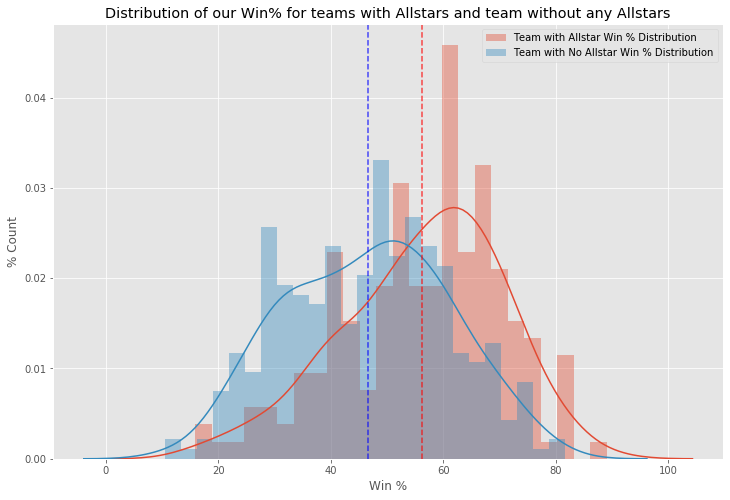

In [57]:
plt.figure(figsize=(12,8))
plt.title('Distribution of our Win% for teams with Allstars and team without any Allstars')
sns.distplot(team_allstar_pct, label ='Team with Allstar Win % Distribution', bins=25)
sns.distplot(team_non_allstar_pct,  label ='Team with No Allstar Win % Distribution',bins=25)
plt.axvline(np.array(team_allstar_pct).mean(), color='r',alpha = 0.7, linestyle='--')
plt.axvline(np.array(team_non_allstar_pct).mean(), color='b',alpha = 0.7, linestyle='--')
plt.ylabel('% Count')
plt.xlabel('Win %')
plt.legend()
# plt.axvline(x=experimental.mean(), color='b',alpha = 0.7, linestyle='--')
#output
print('Welch\'s T-test')
print('-----------------------------------------------------------------')
print(f'Average Allstar Win %: {round((np.array(team_allstar_pct).mean()),2)} % \n Standard Deviation of Allstar Win %: {round((np.array(team_allstar_pct).std()),2)} %')
print('-----------------------------------------------------------------')
print(f'Average Non-Allstar Win %: {round((np.array(team_non_allstar_pct).mean()),2)} % \n Standard Deviation of Non-Allstar Win %: {round((np.array(team_non_allstar_pct).std()),2)} %')
print('-----------------------------------------------------------------')
print(f"-Obs Number over all seasons-\n Team with Allstar = {len(team_allstar_pct)} \n Team with No Allstar = {len(team_non_allstar_pct)}")
print('-----------------------------------------------------------------')
print('T-Critical value:', t_crit)
print('-----------------------------------------------------------------')
print("T-Statistic:", abs(stat_t)," |  " 'p-value:', p )
print('Reject Null Hypothesis due to our p-value being less then 0.025') if p < 0.025 else print('Failed to reject Null Hypothesis')
print('Also as our T-Statistic is greater then our T-Critical value this again is evidence to reject our Null Hypothesis alongside our p-value' if stat_t> t_crit else print('Failed to reject Null Hypothesis'))
print('-----------------------------------------------------------------')
print(f"Cohen's d: {d}")
print("As it is greater then 0.5 this would indicate there is between a medium to large difference in mean between both samples")

In [68]:
formula = 'WIN ~ DF_SCORE + MIN'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                 sum_sq        df             F  PR(>F)
DF_SCORE    2633.099712       1.0  10772.827601     0.0
MIN         1749.799349       1.0   7158.971851     0.0
Residual  115323.693808  471825.0           NaN     NaN
